In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

import sklearn

In [2]:
sklearn.__version__

'0.23.2'

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [3]:
df=pandas.read_csv("Dataframe_melb.csv")
df
#hay que realizar el one hot encoding solo para las variables numericas ya que las variables categoricas
#ya fueron realizada dicha transformacion en el entregable 1

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,zipcode,airbnb_record_count,...,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Yallambie,Suburb_Yarraville,Suburb_others,Type_t,Type_u,Type_nan
0,0.25,0.474490,0.052743,0.068577,0.000000,0.25,0.000466,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.323129,0.052743,0.068577,0.000000,0.00,0.000360,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.469388,0.052743,0.068577,0.333333,0.00,0.000309,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.50,0.260204,0.052743,0.068577,0.333333,0.25,0.000217,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.75,0.515306,0.052743,0.068577,0.000000,0.50,0.000277,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.50,0.169048,0.348101,0.050154,0.333333,0.50,0.000591,0.103967,0.050154,0.005942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13077,0.75,0.394558,0.352321,0.153531,0.333333,0.50,0.001506,0.333769,0.153531,0.055853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13078,0.50,0.321769,0.143460,0.016377,0.333333,0.50,0.000769,0.286482,0.016377,0.021687,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,0.50,0.369048,0.143460,0.016377,0.333333,1.00,0.001007,0.286482,0.016377,0.021687,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns[0:11]
#Visualizo las variables numericas del df

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean'],
      dtype='object')

In [5]:
df['Price'].nunique()
#observo los valores unicos de price

2059

In [6]:
#utilizo solo 100 valores de price asi no se hace muy extensa la matriz
df['Price'].round(2).nunique()

100

In [68]:
df[['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean']].round(2).nunique().sum()
#agrego solo 408 columnas asi no se hace muy extensa la matriz

408

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
one_hot_array=encoder.fit_transform(df[['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean']].round(2))
#realizamos el one hot encoder a las variables numericas
one_hot_array.shape

(13081, 408)

In [10]:
col_names=encoder.get_feature_names(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean'])
#le agregamos los nombres de las columnas correspondientes

In [11]:
one_hot_df=pandas.DataFrame(one_hot_array,columns=col_names)
one_hot_df
#pasamos a data frame el array del one hot encoder

,Rooms_0.0,Rooms_0.25,Rooms_0.5,Rooms_0.75,Rooms_1.0,Price_0.0,Price_0.02,Price_0.03,Price_0.04,Price_0.05,...,airbnb_price_day_mean_0.32,airbnb_price_day_mean_0.33,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13077,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_unique = pandas.concat([df,one_hot_df],axis=1)
df_unique=df_unique.drop(["Rooms"],axis=1)
df_unique=df_unique.drop(["Price"],axis=1)
df_unique=df_unique.drop(["Distance"],axis=1)
df_unique=df_unique.drop(["Postcode"],axis=1)
df_unique=df_unique.drop(["Bathroom"],axis=1)
df_unique=df_unique.drop(["Car"],axis=1)
df_unique=df_unique.drop(['Landsize'],axis=1)
df_unique=df_unique.drop(['Propertycount'],axis=1)
df_unique=df_unique.drop(['zipcode'],axis=1)
df_unique=df_unique.drop(['airbnb_record_count'],axis=1)
df_unique=df_unique.drop(['airbnb_price_day_mean'],axis=1)

df_unique
#eliminamos las variables originales para obtener solo un df con variables encodeadas

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.32,airbnb_price_day_mean_0.33,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [13]:
#se vuelve a agregar las variables YearBuilt y BuildingArea al df realizado
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb=melb_df[['YearBuilt', 'BuildingArea']]
melb

,YearBuilt,BuildingArea
0,NaN,NaN
1,1900.0,79.0
2,1900.0,150.0
3,NaN,NaN
4,2014.0,142.0
...,...,...
13575,1981.0,NaN
13576,1995.0,133.0
13577,1997.0,NaN
13578,1920.0,157.0


In [14]:
merged_unique_df = df_unique.merge(
    melb,left_index=True,right_index=True
)
merged_unique_df
#unifico solo la cantidad de datos que tiene el df_unique

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,79.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,150.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960.0,129.0
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936.0,119.0
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [15]:
merged_unique_df.isna().any().tail(10)
#solo hay valores nulos en las dos variables agregadas

airbnb_price_day_mean_0.34    False
airbnb_price_day_mean_0.35    False
airbnb_price_day_mean_0.36    False
airbnb_price_day_mean_0.4     False
airbnb_price_day_mean_0.41    False
airbnb_price_day_mean_0.43    False
airbnb_price_day_mean_0.62    False
airbnb_price_day_mean_1.0     False
YearBuilt                      True
BuildingArea                   True
dtype: bool

In [16]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_unique_df = pandas.DataFrame(scaler.fit_transform(merged_unique_df),columns=merged_unique_df.columns)
merged_unique_df

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929440,0.018996
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900243,0.017523
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [18]:
# Inputing 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
merged_unique_df_imputer = pandas.DataFrame(imputer.fit_transform(merged_unique_df),columns = merged_unique_df.columns)
merged_unique_df_imputer 

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.926521,0.012782
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930170,0.018318
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929440,0.018996
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900243,0.017523
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.931873,0.020012
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.943552,0.023708


In [19]:
merged_unique_df_imputer.isna().any().tail(10)
#se observa que se realizo la imputacion

airbnb_price_day_mean_0.34    False
airbnb_price_day_mean_0.35    False
airbnb_price_day_mean_0.36    False
airbnb_price_day_mean_0.4     False
airbnb_price_day_mean_0.41    False
airbnb_price_day_mean_0.43    False
airbnb_price_day_mean_0.62    False
airbnb_price_day_mean_1.0     False
YearBuilt                     False
BuildingArea                  False
dtype: bool

In [74]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = merged_unique_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/home/ariel/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


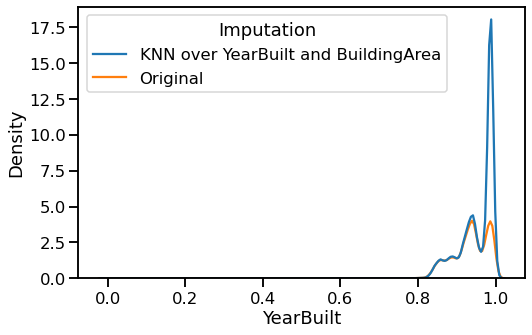

In [76]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = merged_unique_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

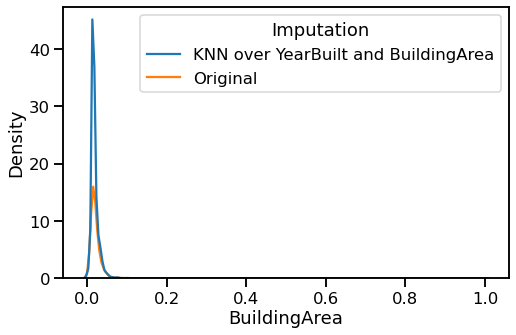

In [77]:
mice_year_built = melb_data_mice.BuildingArea.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = merged_unique_df.BuildingArea.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')

#pruebo imputando con KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = merged_unique_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice = mice_imputer.fit_transform(
    melb_data_mice)

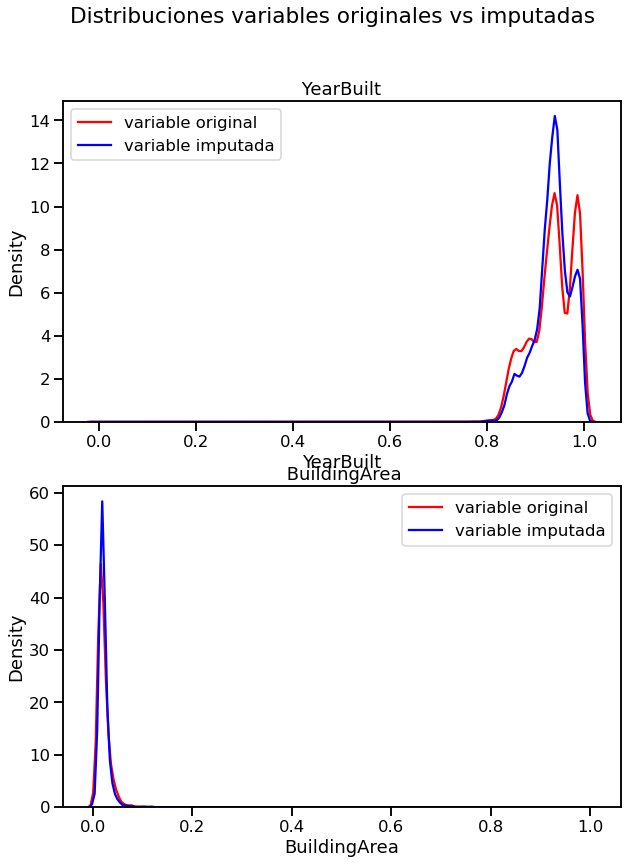

In [79]:
#grafico las distribuciones de las variables originales vs las variables imputadas
fig, axes = plt.subplots(2, figsize=(10, 13))
fig.suptitle('Distribuciones variables originales vs imputadas')
color1='red'
color2='blue'
seaborn.kdeplot(ax=axes[0], x=merged_unique_df['YearBuilt'], color=color1,label='variable original')
axes[0].set_title("\n\n YearBuilt ")
seaborn.kdeplot(ax=axes[0], x=merged_unique_df_imputer['YearBuilt'], color=color2,label='variable imputada')


seaborn.kdeplot(ax=axes[1], x=merged_unique_df['BuildingArea'], color=color1,label='variable original')
axes[1].set_title("\n\n BuildingArea")
seaborn.kdeplot(ax=axes[1], x=merged_unique_df_imputer['BuildingArea'], color=color2,label='variable imputada')

axes[0].legend()
axes[1].legend()

En estos graficos se puede observar que las distribuciones de las variables imputadas son mas suavizadas que las originales, manteniendo su distribucion a diferencia

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [46]:
feature_cols = merged_unique_df_imputer.columns.values
feature_dict = list(merged_unique_df_imputer[feature_cols].T.to_dict().values())
feature_dict[:2]

[{'CouncilArea_Bayside': 0.0,
  'CouncilArea_Boroondara': 0.0,
  'CouncilArea_Brimbank': 0.0,
  'CouncilArea_Casey': 0.0,
  'CouncilArea_Darebin': 0.0,
  'CouncilArea_Frankston': 0.0,
  'CouncilArea_Glen Eira': 0.0,
  'CouncilArea_Greater Dandenong': 0.0,
  'CouncilArea_Hobsons Bay': 0.0,
  'CouncilArea_Hume': 0.0,
  'CouncilArea_Kingston': 0.0,
  'CouncilArea_Knox': 0.0,
  'CouncilArea_Manningham': 0.0,
  'CouncilArea_Maribyrnong': 0.0,
  'CouncilArea_Maroondah': 0.0,
  'CouncilArea_Melbourne': 0.0,
  'CouncilArea_Melton': 0.0,
  'CouncilArea_Monash': 0.0,
  'CouncilArea_Moonee Valley': 0.0,
  'CouncilArea_Moreland': 0.0,
  'CouncilArea_Nillumbik': 0.0,
  'CouncilArea_Other': 0.0,
  'CouncilArea_Port Phillip': 0.0,
  'CouncilArea_Stonnington': 0.0,
  'CouncilArea_Whitehorse': 0.0,
  'CouncilArea_Wyndham': 0.0,
  'CouncilArea_Yarra': 1.0,
  'CouncilArea_others': 0.0,
  'Suburb_Aberfeldie': 0.0,
  'Suburb_Airport West': 0.0,
  'Suburb_Albanvale': 0.0,
  'Suburb_Albert Park': 0.0,
  'Sub

In [47]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [48]:
feature_matrix

<13081x693 sparse matrix of type '<class 'numpy.float64'>'
	with 9065133 stored elements in Compressed Sparse Row format>

In [49]:
if numpy.any(numpy.isnan(feature_matrix.data)):
  feature_matrix.data = numpy.nan_to_num(feature_matrix.data)

In [50]:
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = numpy.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matrix too big! Using only first {} of {} rows".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 34.58 MB
Matrix too big! Using only first 3782 of 13081 rows
Final size: 10.00


In [51]:
if dense_feature_matrix.shape[0] < len(merged_unique_df_imputer):
  melb_df_sample = merged_unique_df_imputer.iloc[:dense_feature_matrix.shape[0]]
else:
  melb_df_sample = merged_unique_df_imputer

In [52]:
melb_df_sample

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.926521,0.012782
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930170,0.018318
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.844282,0.028714
3778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.941606,0.018201
3779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.868613,0.015462
3780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.920925,0.027154


In [53]:
scaled_dense_feature_matrix = dense_feature_matrix

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape

(3782, 20)

In [55]:
pca.explained_variance_ratio_

array([0.07630855, 0.04717047, 0.04313778, 0.03973005, 0.03897941,
       0.03510576, 0.03091463, 0.0294991 , 0.02820958, 0.02671049,
       0.02566453, 0.02531045, 0.0214917 , 0.02097707, 0.0207845 ,
       0.01834642, 0.01791391, 0.01667446, 0.01657182, 0.0159446 ],
      dtype=float32)

In [66]:
pca.explained_variance_ratio_[0:5].sum()

0.24532627

Text(0.5, 0, 'Components')

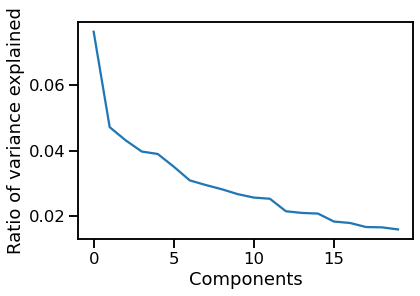

In [57]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")

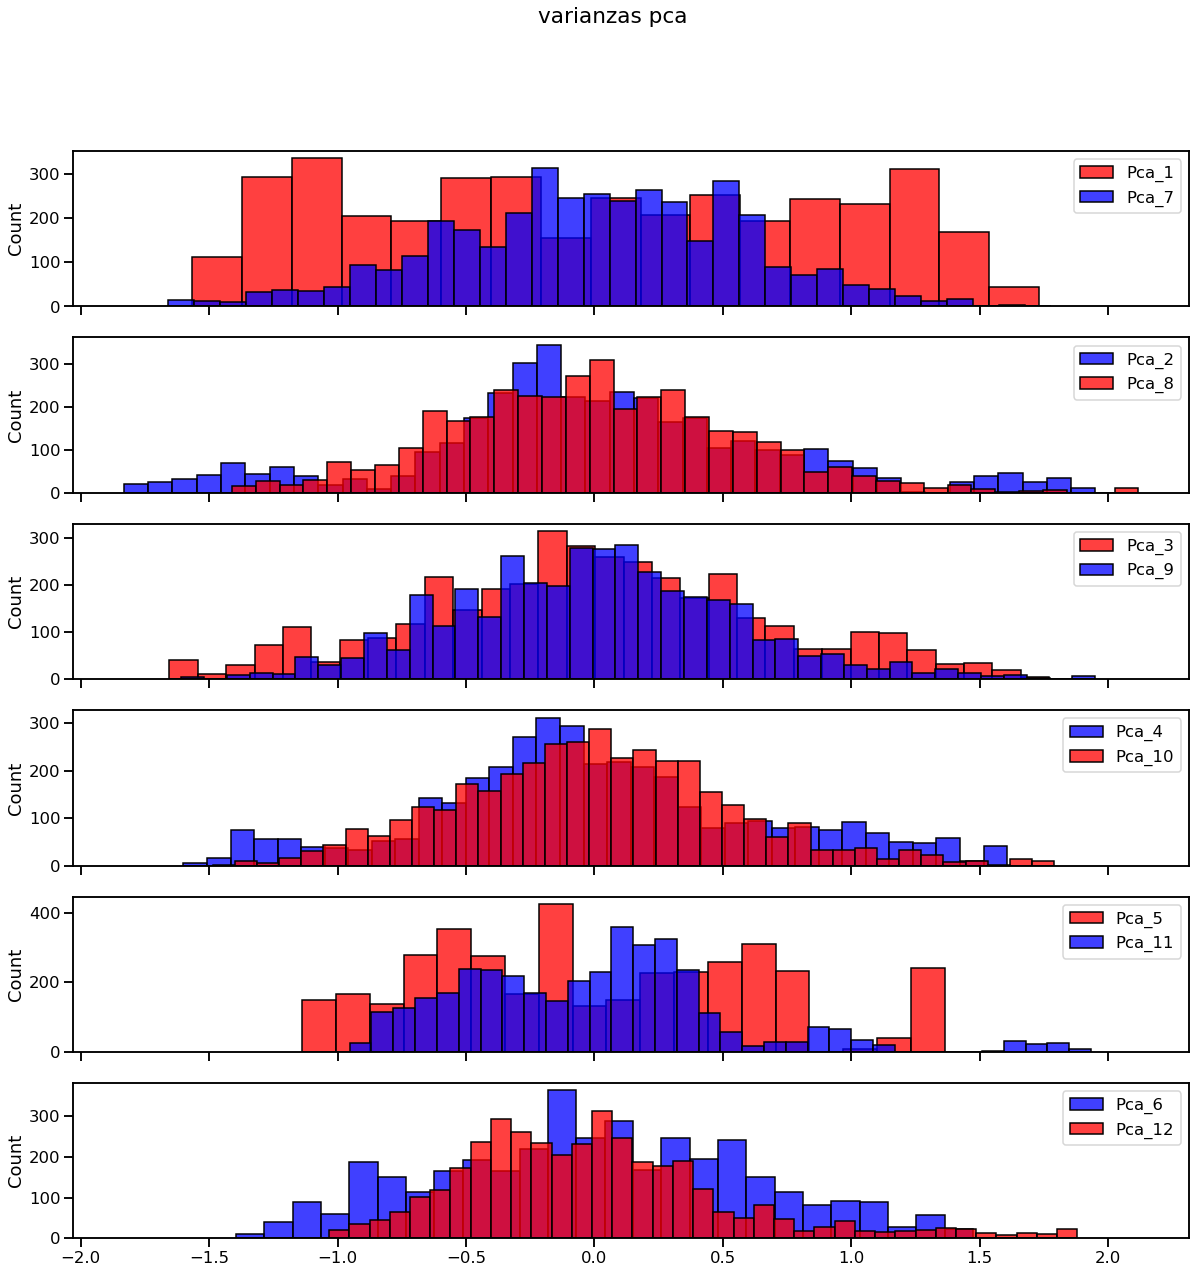

In [58]:
proyected_features
fig, axes = plt.subplots(6, figsize=(20, 20),sharex=True)
fig.suptitle('varianzas pca')
color1='red'
color2='blue'
seaborn.histplot(ax=axes[0], x=proyected_features[:,0], color=color1, label='Pca_1')
seaborn.histplot(ax=axes[1], x=proyected_features[:,1], color=color2,label='Pca_2')
seaborn.histplot(ax=axes[2], x=proyected_features[:,2], color=color1, label='Pca_3')
seaborn.histplot(ax=axes[3], x=proyected_features[:,3], color=color2, label='Pca_4')
seaborn.histplot(ax=axes[4], x=proyected_features[:,4], color=color1, label='Pca_5')
seaborn.histplot(ax=axes[5], x=proyected_features[:,5], color=color2, label='Pca_6')
seaborn.histplot(ax=axes[0], x=proyected_features[:,6], color=color2, label='Pca_7')
seaborn.histplot(ax=axes[1], x=proyected_features[:,7], color=color1, label='Pca_8')
seaborn.histplot(ax=axes[2], x=proyected_features[:,8], color=color2, label='Pca_9')
seaborn.histplot(ax=axes[3], x=proyected_features[:,9], color=color1, label='Pca_10')
seaborn.histplot(ax=axes[4], x=proyected_features[:,10], color=color2, label='Pca_11')
seaborn.histplot(ax=axes[5], x=proyected_features[:,11], color=color1, label='Pca_12')

axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[4].legend()
axes[5].legend()

In [59]:
melb_df_sample[['Pca_1', 'Pca_2','Pca_3', 'Pca_4','Pca_5']] = proyected_features[:,:5]

/home/ariel/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-59-c002a13f9469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb_df_sample[['Pca_1', 'Pca_2','Pca_3', 'Pca_4','Pca_5']] = proyected_features[:,:5]
/home/ariel/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

<AxesSubplot:xlabel='Pca_1', ylabel='Pca_2'>

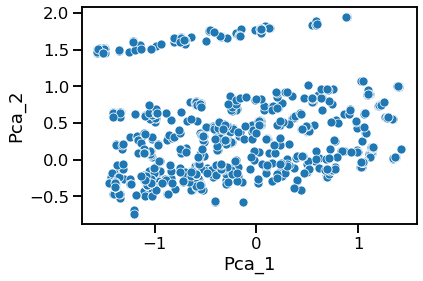

In [60]:

data = melb_df_sample[cols + ['Pca_1', 'Pca_2']][:1000].dropna(how='any')
seaborn.scatterplot(data=data, x='Pca_1', y='Pca_2')
                     


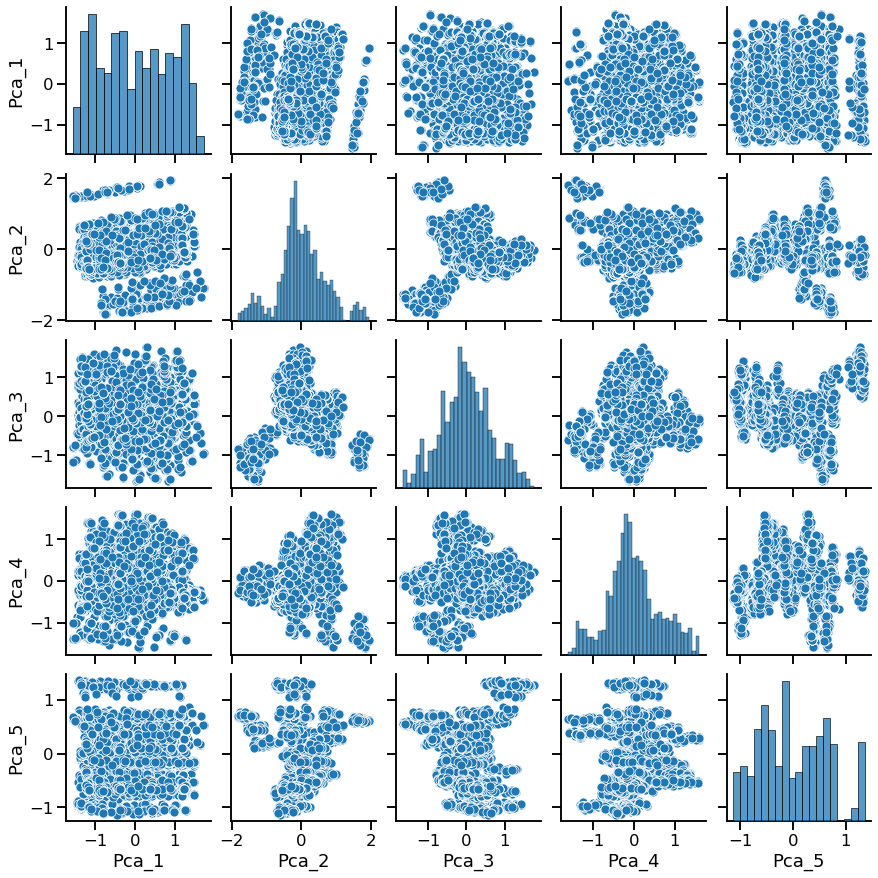

In [61]:
seaborn.pairplot(data=melb_df_sample,
                x_vars=['Pca_1', 'Pca_2','Pca_3', 'Pca_4','Pca_5'],
                y_vars=['Pca_1', 'Pca_2','Pca_3', 'Pca_4','Pca_5'])

In [62]:
#col_names=encoder.get_feature_names(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
 #      'Propertycount', 'zipcode', 'airbnb_record_count',
 #      'airbnb_price_day_mean']) 

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [63]:
melb_df_sample.columns

Index(['CouncilArea_Bayside', 'CouncilArea_Boroondara', 'CouncilArea_Brimbank',
       'CouncilArea_Casey', 'CouncilArea_Darebin', 'CouncilArea_Frankston',
       'CouncilArea_Glen Eira', 'CouncilArea_Greater Dandenong',
       'CouncilArea_Hobsons Bay', 'CouncilArea_Hume',
       ...
       'airbnb_price_day_mean_0.43', 'airbnb_price_day_mean_0.62',
       'airbnb_price_day_mean_1.0', 'YearBuilt', 'BuildingArea', 'Pca_1',
       'Pca_2', 'Pca_3', 'Pca_4', 'Pca_5'],
      dtype='object', length=698)

In [64]:
melb_df_sample.to_csv('Dataframe_melb_pca.csv',index=False)

In [65]:
new_df=pandas.read_csv("Dataframe_melb_pca.csv")
new_df

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea,Pca_1,Pca_2,Pca_3,Pca_4,Pca_5
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.926521,0.012782,1.107076,0.038113,0.229412,-0.119664,-0.218405
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.856448,0.011633,0.774957,-0.098134,0.257542,-0.054175,-0.225289
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.856448,0.022088,-0.568941,-0.272935,-0.191413,0.161984,-0.192871
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.930170,0.018318,-0.209273,-0.141916,-0.253923,0.097493,-0.181674
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.995134,0.020910,-0.178452,-0.225916,0.250966,-0.023798,-0.246629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.844282,0.028714,0.257665,0.608393,-0.099056,0.570677,-0.131832
3778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.941606,0.018201,-0.884247,0.410847,-0.214918,0.513184,-0.162157
3779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.868613,0.015462,-0.243083,0.551669,-0.546316,0.956265,-0.143041
3780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.920925,0.027154,-1.039004,0.429747,-0.524808,0.778570,-0.127103


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
    2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```